PYBER

In [1]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
city_csv = "city_data.csv"
ride_csv = "ride_data.csv"

In [3]:
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [4]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
ride_city_df = pd.merge(ride_df,city_df,on="city")
ride_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [7]:
#group by city 
group_city_df = ride_city_df.groupby(['city','type'])

#average fare per city
average_fare = group_city_df["fare"].mean()

#total number of rides per city
total_rides_city = group_city_df["city"].count()

#total number of drivers per city
total_driver_city= group_city_df["driver_count"].mean()

#create new dataframe by city
city_summary = pd.DataFrame({"Average Fare":average_fare,
                             "Total Number of Ride":total_rides_city,
                            "Total Number of Drivers":total_driver_city})

city_summary.head()

,,Average Fare,Total Number of Drivers,Total Number of Ride
city,type,,,
Alvarezhaven,Urban,23.928710,21,31
Alyssaberg,Urban,20.609615,67,26
Anitamouth,Suburban,37.315556,16,9
Antoniomouth,Urban,23.625000,21,22
Aprilchester,Urban,21.981579,49,19


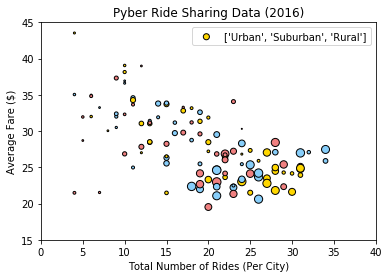

In [13]:
#Bubble Plot of Ride Sharing Data

x_axis = city_summary['Total Number of Ride']
y_axis = city_summary['Average Fare']
s = city_summary['Total Number of Drivers']
labels = ["Urban","Suburban","Rural"]
colors = ["gold","lightskyblue","lightcoral"]


plt.scatter(x_axis,y_axis,marker = "o",facecolors = ["gold","lightskyblue","lightcoral"],label=labels, edgecolors ="black",s=s)

plt.xlim(0,40)
plt.ylim (15,45)
plt.title ("Pyber Ride Sharing Data (2016)")
plt.xlabel ("Total Number of Rides (Per City)")
plt.ylabel ("Average Fare ($)")
plt.legend (loc = "upper right")

plt.show()

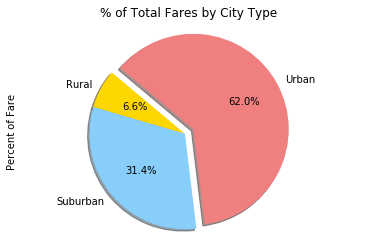

In [9]:
# % of Total Fares by City Type Pie Chart
#group by city type 
group_city_df = ride_city_df.groupby(['type'])

# % of Total Fares by City Type
total_fare = ride_city_df["fare"].sum()
percent_fare = (group_city_df ["fare"].sum()/total_fare)

#create new dataframe by city type
fares_df = pd.DataFrame({"Percent of Fare":percent_fare})

type_list = fares_df.keys()
fares_pie = fares_df.plot(kind="pie",y=type_list,
                          title="% of Total Fares by City Type",
                         legend=False,colors=["gold","lightskyblue","lightcoral"],
                          shadow =True, startangle=140,autopct="%1.1f%%",
                         explode=[0,0,.1])
fares_pie.axis('equal')
plt.show()

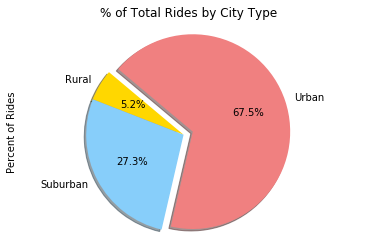

In [10]:
# % of Total Rides by City Type Pie Chart

# % of Total Rides by City Type
total_rides = ride_city_df["ride_id"].count()
percent_rides = group_city_df ["ride_id"].count()/total_rides

#create new dataframe by city type
rides_df = pd.DataFrame({"Percent of Rides":percent_rides})

type_list = rides_df.keys()
rides_pie = rides_df.plot(kind="pie",y=type_list,
                          title="% of Total Rides by City Type",
                         legend=False,colors=["gold","lightskyblue","lightcoral"],
                          shadow =True, startangle=140,autopct="%1.1f%%",
                         explode=[0,0,.1])
rides_pie.axis('equal')
plt.show()

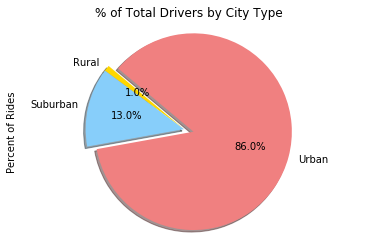

In [11]:
# % of Total Drivers by City Type Pie Chart

# % of Total Drivers by City Type
total_drivers = city_df["driver_count"].sum()
percent_drivers = group_city_df ["driver_count"].sum()/total_drivers

#create new dataframe by city type
drivers_df = pd.DataFrame({"Percent of Rides":percent_drivers})

type_list = drivers_df.keys()
drivers_pie = drivers_df.plot(kind="pie",y=type_list,
                          title="% of Total Drivers by City Type",
                         legend=False,colors=["gold","lightskyblue","lightcoral"],
                          shadow =True, startangle=140,autopct="%1.1f%%",
                         explode=[0,0,.1])
drivers_pie.axis('equal')
plt.show()

# Observations
1. Urban areas have the majority of drivers, riders and fares.
2. Suburban and rural areas have higher fares compared to the low amount of drivers. May be due to distance which would cause fares to rise.
3. Suburban and rural areas also have higher demand of riders relative to the percent of drivers. Public transportion could influence rider demand.